In [1]:
import shap
import xgboost

from randomForest import prepareData
from randomForest import runRandomForest
from sklearn.metrics import accuracy_score

In [2]:
filePath = "../../data/core/uk/final/uk_final.csv"
accuracyListXG = []
accuracyListRF = []

In [57]:
trainingData, trainingRt, testData, testRt = prepareData(filePath)


In [58]:
params = {
        'colsample_bynode': 0.8,
        'learning_rate': 0.1,
        'max_depth': 15,
        'num_parallel_tree': 100,
        'objective': 'multi:softmax',
        'subsample': 0.75,
        'tree_method': 'gpu_hist',
        "num_class" : 3,
}

classiferXG = xgboost.train(params, xgboost.DMatrix(trainingData, label=trainingRt), 1)
classifer, accuracyRF = runRandomForest(trainingData, trainingRt, testData, testRt)

[11:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
prediction = classiferXG.predict(xgboost.DMatrix(testData))

In [60]:
accuracyXG = accuracy_score(testRt, prediction)

In [61]:
accuracyListXG.append(accuracyXG)
accuracyListRF.append(accuracyRF)
print(len(accuracyListXG))

10


In [62]:
print(sum(accuracyListXG) / len(accuracyListXG))
print(sum(accuracyListRF) / len(accuracyListRF))

0.7072454715802625
0.772579637726421


In [63]:
explainer = shap.TreeExplainer(classifer)

In [64]:

shapValues = explainer.shap_values(trainingData)

In [74]:
shap.initjs()

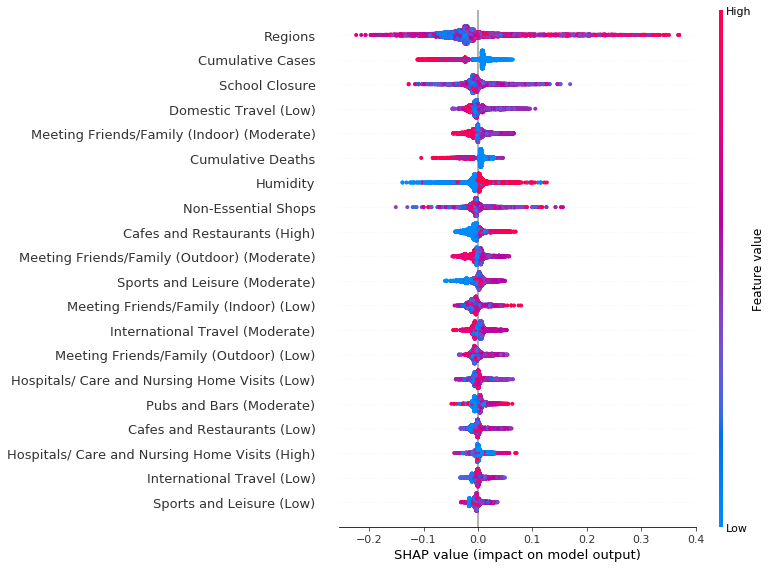

In [65]:
shap.summary_plot(shapValues[0], trainingData)

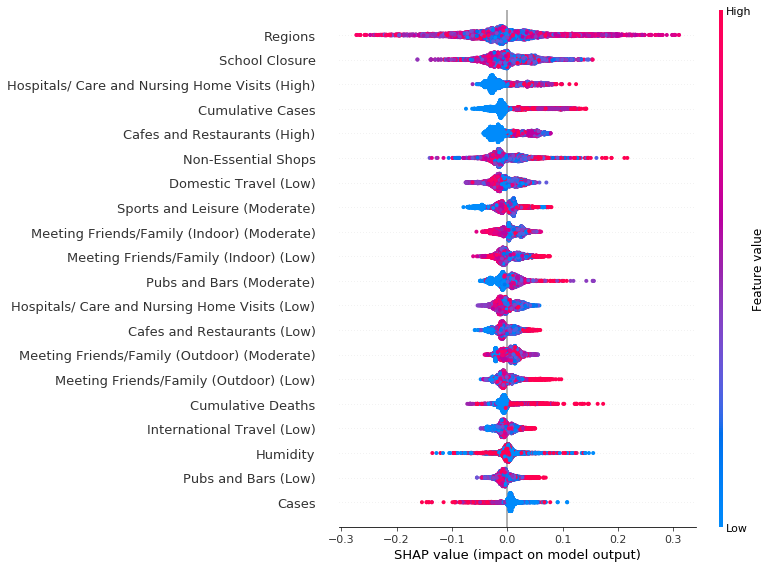

In [66]:
shap.summary_plot(shapValues[1], trainingData)

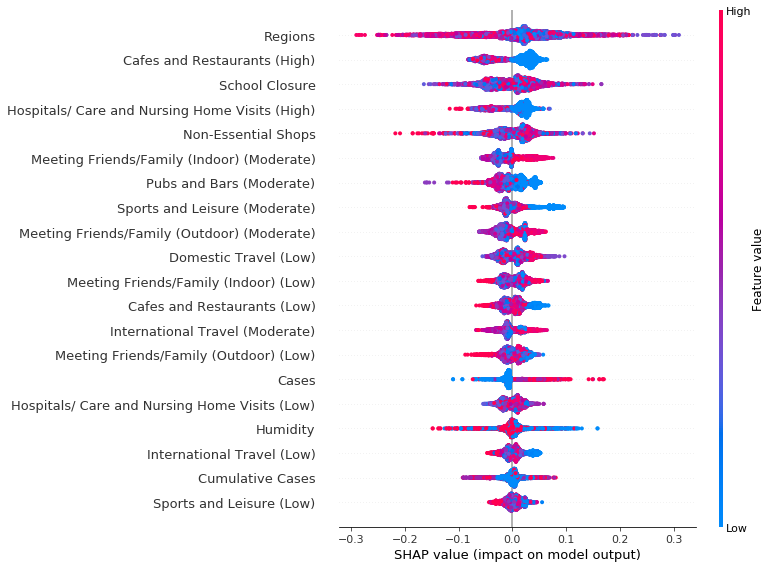

In [67]:
shap.summary_plot(shapValues[2], trainingData)

In [75]:
trainingData.iloc[0,:]

Regions                                                2
Cases                                                  1
Cumulative Cases                                       2
Deaths                                                 0
Cumulative Deaths                                      2
Tests                                                  0
Cumulative Tests                                       0
Meeting Friends/Family (Indoor) (Low)                 33
Meeting Friends/Family (Indoor) (Moderate)            27
Meeting Friends/Family (Indoor) (High)                 0
Meeting Friends/Family (Outdoor) (Low)                33
Meeting Friends/Family (Outdoor) (Moderate)           27
Meeting Friends/Family (Outdoor) (High)                0
Domestic Travel (Low)                                 33
Domestic Travel (Moderate)                             0
Domestic Travel (High)                                 0
International Travel (Low)                            33
International Travel (Moderate)

In [68]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][1], 
                trainingData.iloc[1])

In [69]:
shap.force_plot(explainer.expected_value[1],
                shapValues[0][1], 
                trainingData.iloc[1])

In [70]:
shap.force_plot(explainer.expected_value[2],
                shapValues[0][1], 
                trainingData.iloc[1])

In [72]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][:100], 
                trainingData.iloc[:100])

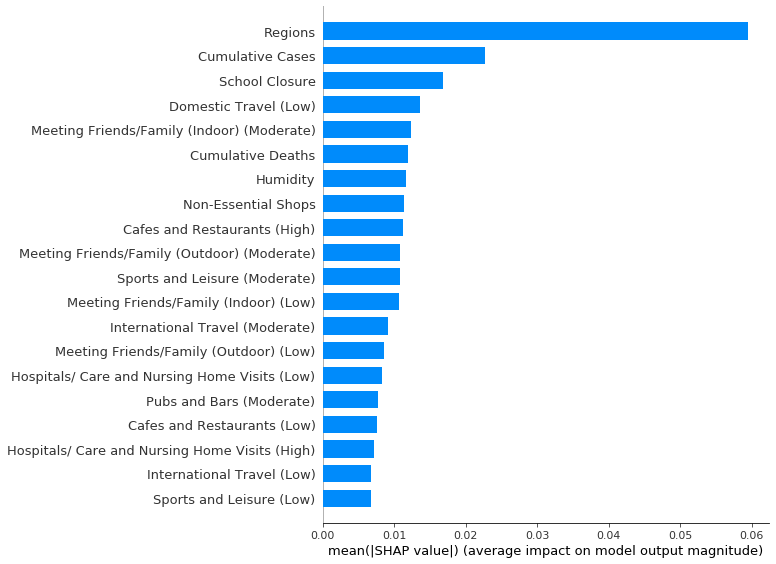

In [73]:
shap.summary_plot(shapValues[0], trainingData, plot_type="bar")

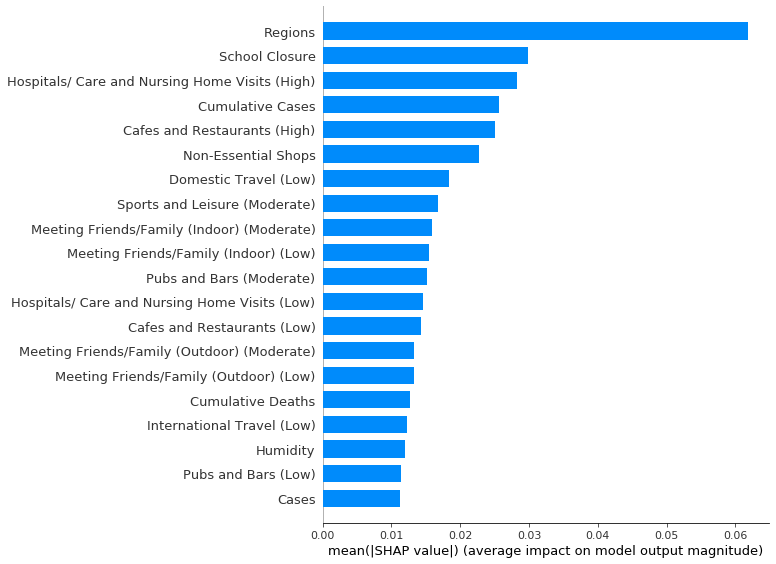

In [74]:
shap.summary_plot(shapValues[1], trainingData, plot_type="bar")

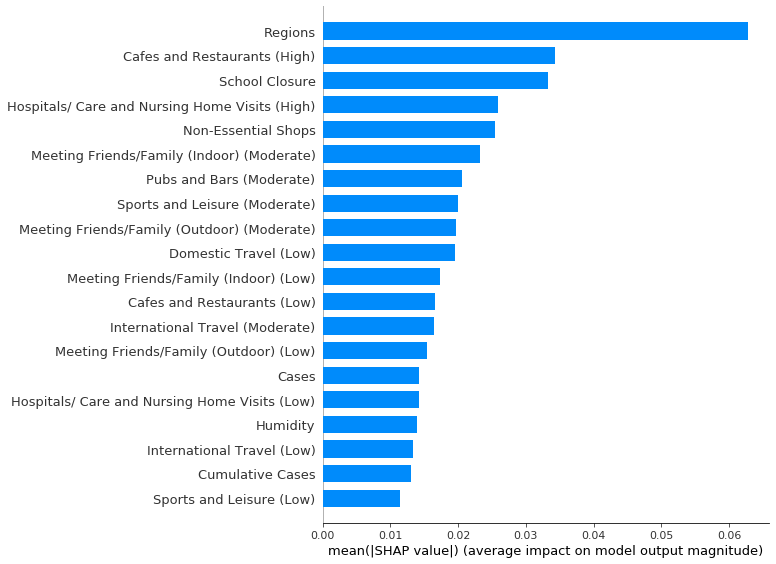

In [75]:
shap.summary_plot(shapValues[2], trainingData, plot_type="bar")